# Question 1
<img src= "Q1.png">

### Import Libraries

In [1]:
!pip install sympy

In [2]:
import warnings
warnings.filterwarnings("ignore")

import sympy
from sympy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm
import time

### Steepest Descent Algorithm(Line Search)

In [3]:
#Steepet Descent Algorithm
def steepestDescent(df, func, xk, threshold = 10**(-6)):
    
    f_list = []
    counter = 0
    
    while (true):
        #Hessian Matrix
        hessian_x = hessian(f(x), [x1, x2, x3]).subs([(x1,xk[0][0]), (x2,xk[0][1]), (x3,xk[0][2])])
        
        #Gradient
        grad = Matrix([f(x)]).jacobian(Matrix([x1,x2,x3])).subs([(x1,xk[0][0]), (x2,xk[0][1]), (x3,xk[0][2])])
        
        #Alpha Calculation
        num = grad * grad.T;
        den = (grad * hessian_x * grad.T);
        num = np.asarray(num).flatten();
        den = np.asarray(den).flatten();
        num = num[0];
        den = den[0];
        alpha = float(num)/float(den);
        
        #Second order Condition (d.T * H(x) * d >= 0)
        second_order = ((-1 * grad) * hessian_x * (-1 * grad.T))[0]
        
        #xk calculation
        xk = xk - (alpha * grad)
        xk = np.asarray(xk);
        grad = np.asarray(grad);
        grad = grad.astype(float)
    
        #Threshold condition
        check = norm(alpha * grad);
        
        #Stopping Threshold condition
        if(check <= threshold):
            break;
            
        #Objective Function at updated xk
        fkVal = funcVal(xk);
        f_list.append(fkVal)
        
        #Increment Iteration counter
        counter = counter + 1;
        
        #Round Values
        x1_round = round(xk[0][0],4)
        x2_round = round(xk[0][1],4)
        x3_round = round(xk[0][2],4)
        fkVal_round = round(fkVal,4);
        #second_order_round = round(second_order,3)
        
        #Output Data
        df = df.append({'Iteration': counter, 'alpha': alpha, 'x1': x1_round, 'x2': x2_round, 'x3': x3_round, 'f(x)': fkVal_round, 'Second order': second_order}, ignore_index=True)
        
        
    
    return f_list, df


In [4]:
x = sympy.symbols('x')
x1 = sympy.symbols('x1')
x2 = sympy.symbols('x2')
x3 = sympy.symbols('x3')
f = sympy.Function('f')
xk = np.array([[1,1,1]]); # Initial Value of vector x
t = time.process_time()
df = pd.DataFrame(columns=['Iteration', 'alpha', 'x1', 'x2','x3', 'f(x)', 'Second order'])


#Objective Function
def f(x):
    return (x1+5)**2 + (x2+8)**2 + (x3+7)**2 + 2*x1**2*x2**2 + 4*x1**2*x3**2

#Function Value
def funcVal(xk):
    return f(x).subs(x1, xk[0][0]).subs(x2, xk[0][1]).subs(x3, xk[0][2]);

#Call Steepest Descent Algorithm
f_list, df = steepestDescent(df, f(x), xk);

#Total time to reach solution
total_time = time.process_time() - t


### Output

In [5]:
df.to_csv('Output - Steepest Descent Algorithm.csv', sep='\t')
df

,Iteration,alpha,x1,x2,x3,f(x),Second order
0,1,0.037516,0.0996,0.1746,0.0996,143.2365,43608
1,2,0.445530,-4.4534,-7.1125,-6.2301,5087.4350,1287.90946389077
2,3,0.001179,-1.7627,-6.4496,-5.0669,594.2034,5516650807.68812
3,4,0.002331,-0.2505,-6.2700,-4.7823,41.1396,189587186.976034
4,5,0.002940,-0.0278,-6.2756,-4.7883,32.7197,1952129.57679636
5,6,0.216761,-0.1252,-7.0189,-5.7407,29.9245,144.245373476558
6,7,0.002173,-0.0211,-7.0222,-5.7446,27.4242,1060735.84977134
7,8,0.200240,-0.0692,-7.4113,-6.2433,26.5033,50.1161035136894
8,9,0.001885,-0.0185,-7.4133,-6.2457,25.8196,385232.835751911
9,10,0.187848,-0.0452,-7.6318,-6.5259,25.4970,19.1570066855414


### (a) Verify that the final solution satisfies the second order necessary conditions for a minimum.

Second order necessary conditions - 

1) grad(xmin) = 0

2) d.T * H(x) * d >= 0 where d = -(grad(xmin))

In our scenario,

xmin = [-0.0154, -7.9962, -6.9933]

f(xmin) = 24.9230

second_order = d.T * H(xmin) * d = 1.72837173584467e-8 >= 0 (satisfied)


### (b) Plot the value of the objective function with respect to the number of iterations

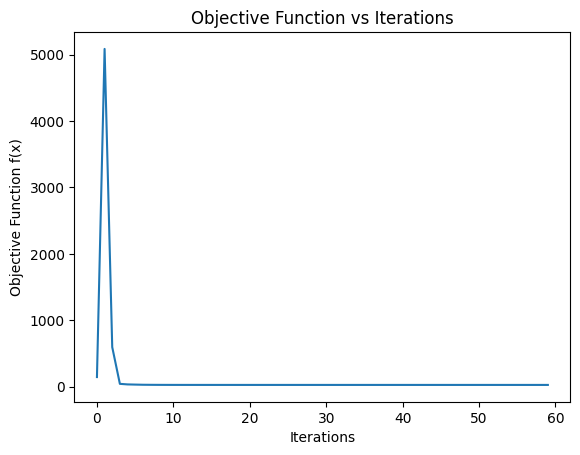

In [6]:
plt.plot(range(len(f_list)),f_list);
plt.xlabel('Iterations')
plt.ylabel('Objective Function f(x)')
plt.title("Objective Function vs Iterations")
plt.savefig('Objective Function vs Iterations Plot.png')

### Zoom out plot to check minima

Text(0.5, 1.0, 'Objective Function vs Iterations:Zoomed In')

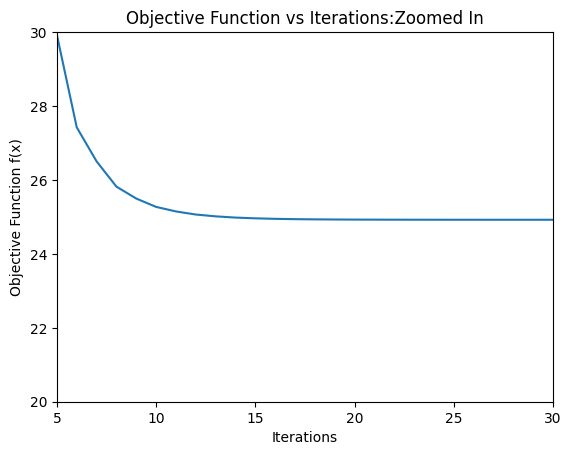

In [7]:
plt.plot(range(len(f_list)),f_list);
plt.xlim(5, 30)
plt.ylim(20, 30)
plt.xlabel('Iterations')
plt.ylabel('Objective Function f(x)')
plt.title("Objective Function vs Iterations:Zoomed In")


### (c) Comment on the convergence speed of the algorithm.

In [8]:
print("Total time to reach the solution: " +str(total_time) + ' Seconds')

Total time to reach the solution: 3.34375 Seconds


Optimum Solution

xmin = [-0.0154, -7.9962, -6.9933]

f(xmin) = 24.9230

Total Time = 2.96875 Seconds

As we can see in the plot(function vs Iterations), we reached the optimum solution at 25th iteration 
which shows that our algorithm is faster. 
